<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

[ -53.468412   -1.26256    -3.506193 -107.2232    -49.13195     8.901224
   -5.466242   -5.762632   -0.600586    1.222678   -3.956637  -21.989895
   -6.118123  -10.46844    -4.119557   -3.029419  -21.761523   -1.512952
   -4.754912    6.507233]
[[-3.292157]
 [ 0.799528]
 [-0.936214]
 [-4.72268 ]
 [-3.602674]
 [ 4.931834]
 [-0.850265]
 [ 2.454072]
 [ 2.309657]
 [ 0.768204]
 [ 1.567869]
 [-2.362821]
 [-0.283113]
 [ 1.634975]
 [ 0.66841 ]
 [ 0.998977]
 [-2.482237]
 [ 2.615475]
 [ 1.060797]
 [ 4.562287]]
[[-3.292157]
 [ 0.799528]
 [-0.936214]
 [-4.72268 ]
 [-3.602674]
 [ 4.931834]
 [-0.850265]
 [ 2.454072]
 [ 2.309657]
 [ 0.768204]
 [ 1.567869]
 [-2.362821]
 [-0.283113]
 [ 1.634975]
 [ 0.66841 ]] [[ 0.998977]
 [-2.482237]
 [ 2.615475]
 [ 1.060797]
 [ 4.562287]]
[ -53.468412   -1.26256    -3.506193 -107.2232    -49.13195     8.901224
   -5.466242   -5.762632   -0.600586    1.222678   -3.956637  -21.989895
   -6.118123  -10.46844    -4.119557] [ -3.029419 -21.761523  -1.512952  -4.754912   6

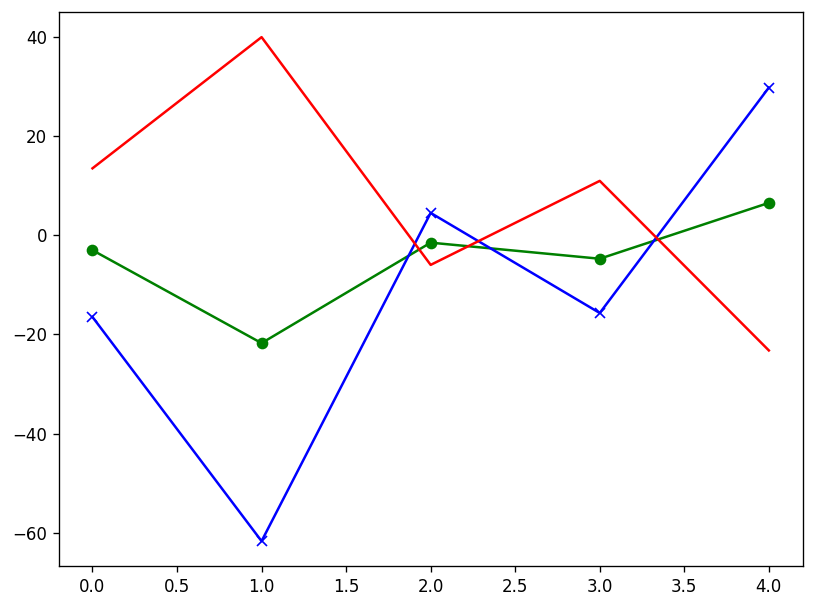

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/data.csv", header=None)

y = data.iloc[:, 1]
y = y.values
print(y)
data.drop(data.columns[1],inplace=True,axis = 1)
x = data.values
print(x)

x_train,x_test = np.split(x,[15])
print(x_train,x_test)
y_train,y_test = np.split(y,[15])
print(y_train,y_test)

#ones = np.ones(x_train.shape[0])
#mean = np.dot(ones, x_train) / x_train.shape[0]
#std = np.sqrt(np.dot(ones, (x_train - mean)**2) / x_train.shape[0])

# print(mean)
# print(std)
#x_train = (x_train - mean) / std
#x_test = (x_test - mean) / std

#print(x_train)
#print(x_test)

train_min = np.min(x_train,0)
train_max = np.max(x_train,0)
test_min = np.min(x_test,0)
test_max = np.max(x_test,0)
print(train_max)
print(train_min)
print(test_max)
print(test_min)
#if you find any issue in the output cell try "Run All" in the 'Runtime' tab

x_train = (x_train - train_min) / (train_max - train_min)
x_test = (x_test - test_min) / (test_max - test_min)

print(x_train.shape)
print(type(x_train))
print(x_test.shape)
print(type(x_test))

x1 = np.ones((15,1))
x2=np.ones((5,1))
x_train = np.hstack((x1,x_train))
x_test=np.hstack((x2,x_test))
print(x_train,x_test)

xt = np.linalg.pinv(x_train)
theta = np.dot(xt,y_train)
print(theta)

y1 = np.dot(x_test,theta)
print(y1)

e = y_test-y1
print(e)

SSE = e.dot(e)
SST =  np.dot((y_test - np.mean(y_test)),(y_test - np.mean(y_test)))
RS = 1 - SSE/SST
print(RS)

plt.figure(figsize = (8,6), dpi = 120)
plt.plot(np.arange(len(y_test)), y_test, marker = "o" , c='g')
plt.plot(np.arange(len(y_test)), y1, marker = "x" , c='b')
plt.plot(np.arange(len(y_test)),e , c='r')


<ipython-input-8-9027944ebd22>:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(X, y)[0]


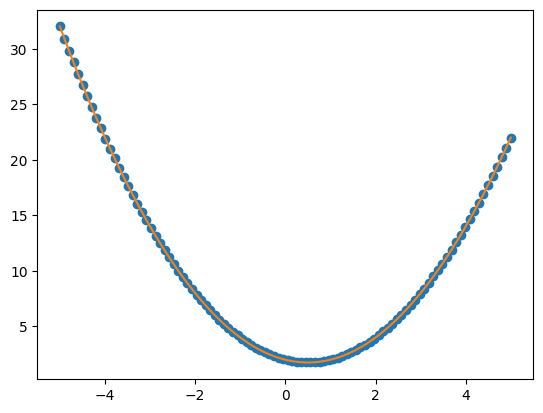

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a function to generate quadratic data
def generate_quadratic_data(x, a, b, c):
    y = a * x**2 + b * x + c
    return y

# Generate some quadratic data
x = np.linspace(-5, 5, 100)
y = generate_quadratic_data(x, 1, -1, 2)

# Add some noise to the data
data=pd.read_csv("/content/data.csv",header=None)

# Create a design matrix for the quadratic regression
X = np.vstack([np.ones(len(x)), x, x**2]).T

# Fit the quadratic regression model
theta = np.linalg.lstsq(X, y)[0]

# Make predictions using the fitted model
y_pred = X @ theta

# Plot the data and the fitted model
plt.plot(x, y, 'o', label='Data')
plt.plot(x, y_pred, label='Fitted model')


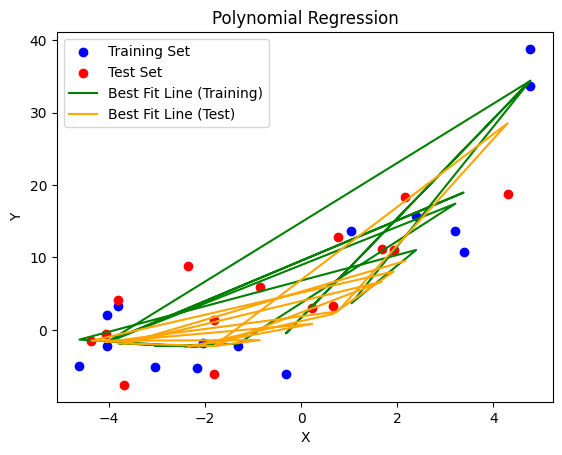

Optimal theta: [0.21967752 2.48038859 0.72001616 0.05540767]
MSE on Training Set: 21.687136066158896
MSE on Test Set: 39.32357376145138


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
data=pd.read_csv("/content/data.csv",header=None)
X = np.random.uniform(-5, 5, 30)
Y = 2 + 1.5*X + 0.5*X**2 + 0.1*X**3 + np.random.normal(0, 5, 30)

# Split the data into training and test sets
train_size = 15
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create the design matrix X for the training set
X_train_matrix = np.column_stack([np.ones(train_size), X_train, X_train**2, X_train**3])

# Calculate the optimal theta using the normal equation
theta_optimal = np.linalg.inv(X_train_matrix.T @ X_train_matrix) @ X_train_matrix.T @ Y_train

# Create the design matrix X for the test set
X_test_matrix = np.column_stack([np.ones(len(X_test)), X_test, X_test**2, X_test**3])

# Make predictions on both training and test sets
Y_train_pred = X_train_matrix @ theta_optimal
Y_test_pred = X_test_matrix @ theta_optimal

# Calculate mean squared error for training and test sets
MSE_train = np.mean((Y_train - Y_train_pred)**2)
MSE_test = np.mean((Y_test - Y_test_pred)**2)

# Plot the training set, test set, and best fit lines
plt.scatter(X_train, Y_train, label='Training Set', color='blue')
plt.scatter(X_test, Y_test, label='Test Set', color='red')
plt.plot(X_train, Y_train_pred, label='Best Fit Line (Training)', color='green')
plt.plot(X_test, Y_test_pred, label='Best Fit Line (Test)', color='orange')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()

# Report results
print(f"Optimal theta: {theta_optimal}")
print(f"MSE on Training Set: {MSE_train}")
print(f"MSE on Test Set: {MSE_test}")
